# Seminar 2 - Answers

### Question 1

The “Current Population Survey” (CPS), which provides data on US labor force characteristics of the population, including the level of employment, unemployment, and earnings. The file CPS96_15 contains the data for 1996 and 2015 (from the March 1997 and 2016 surveys). These data are for full-time workers, defined as workers employed more than 35 hours per week for at least 48 weeks in the previous year. Data are provided for workers whose highest educational achievement is (1) a high school diploma, and (2) a bachelor’s degree.


|Variable|Description|
| -------- | ------- |
|FEMALE|1 if female; 0 if male|
|YEAR|Year|
|AHE|Average Hourly Earnings|
|BACHELOR|1 if worker has a bachelor’s degree; 0 if worker has a high school degree|
|AGE|Age|

In [1]:
import numpy as np
import pandas as pd

In [2]:
cps = pd.read_excel('CPS96_15.xlsx')

In [3]:
cps

,year,ahe,bachelor,female,age
0,1996,11.171735,0,0,31
1,1996,8.653846,0,1,31
2,1996,9.615385,1,1,27
3,1996,11.217949,1,0,26
4,1996,9.615385,1,1,28
...,...,...,...,...,...
13196,2015,96.153847,1,0,25
13197,2015,30.769230,1,0,34
13198,2015,9.230769,0,0,27
13199,2015,13.653846,1,1,27


<b> (a) Compute the sample mean for average hourly earnings (AHE) in 1996 and 2015. <b/>

In [4]:
cps_96 = cps[cps["year"]==1996]
cps_15 = cps[cps["year"]==2015]

# Calculating the Sample Mean for the AHE
ahe_mean_96 = np.mean(cps_96["ahe"])
ahe_mean_15 = np.mean(cps_15["ahe"])

print("The sample mean for the AHE are", round(ahe_mean_96,2),round(ahe_mean_15,2))

The sample mean for the AHE are 12.69 21.24


<b>(b) Compute the sample standard deviation for AHE in 1996 and 2015.<b/>

In [5]:
# Calculating the Sample Standard Deviation for the AHE
ahe_std_96 = np.std(cps_96["ahe"])
ahe_std_15 = np.std(cps_15["ahe"])

print("The sample standard deviation for the AHE are",round(ahe_std_96,2),round(ahe_std_15,2))

The sample standard deviation for the AHE are 6.36 12.12


<b>(c) Construct a 95% confidence interval for the population means of AHE in 1996 and 2015.<b/>

In [6]:
# Finding the standard error of the mean Average Hourly Earnings

n_96 = len(cps_96["ahe"])
n_15 = len(cps_15["ahe"])

ahe_se_96 = ahe_std_96/np.sqrt(n_96)
ahe_se_15 = ahe_std_15/np.sqrt(n_15)

# Finding the 95% conficence interval of Average Hourly Earnings

ll_ahe_96 = ahe_mean_96 - 1.96*ahe_se_96
ul_ahe_96 = ahe_mean_96 + 1.96*ahe_se_96

ll_ahe_15 = ahe_mean_15 - 1.96*ahe_se_15
ul_ahe_15 = ahe_mean_15 + 1.96*ahe_se_15

print("The 95% confidence interval for the 96 AHE is", round(ll_ahe_96,2),round(ul_ahe_96,2))
print("The 95% confidence interval for the 15 AHE is", round(ll_ahe_15,2),round(ul_ahe_15,2))

The 95% confidence interval for the 96 AHE is 12.53 12.85
The 95% confidence interval for the 15 AHE is 20.96 21.52


<b>(d) Construct a 95% confidence interval for the change in the population means of AHE between 1996 and 2015.<b/>

In [7]:
# Finding the Standard error of the difference of mean Average Hourly Earnings
ahe_se_diff = np.sqrt(ahe_se_96**2+ahe_se_15**2)

# Finding the 95% conficence interval of the difference of mean Average Hourly Earnings
ll_ahe_diff = ahe_mean_15 - ahe_mean_96 - 1.96*ahe_se_diff
ul_ahe_diff = ahe_mean_15 - ahe_mean_96 + 1.96*ahe_se_diff

print("The 95% confidence interval for the difference of means is", round(ll_ahe_diff,2),round(ul_ahe_diff,2))

The 95% confidence interval for the difference of means is 8.22 8.87


<b> (e) Create a correlation matrix and heatmap for the Average Hourly Earnings and Age.<b/>

In [ ]:
# Creating correlation matrix

df = cps.get(["ahe","age"])
corr_matrix = round(df.corr(),2)
print(corr_matrix)

      ahe   age
ahe  1.00  0.12
age  0.12  1.00


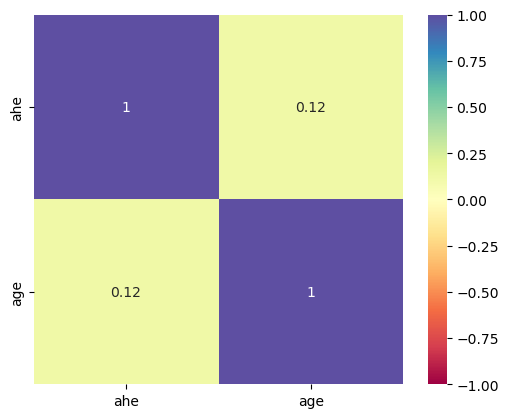

In [ ]:
# Creating correlation heatmap

sn.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, cmap=sn.color_palette("Spectral", as_cmap=True), square=True, annot=True)
plt.show()

<b> (f) Draw a scatterplot of Average Hourly Earnings per Age discriminated by Bachelor. Whst does this result suggest? <b/>

<AxesSubplot:xlabel='age', ylabel='ahe'>

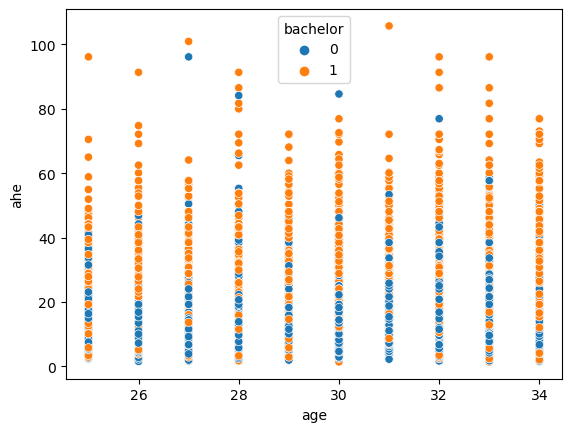

In [ ]:
# Scatterplot

sn.scatterplot(data=cps, x="age", y="ahe", hue="bachelor")

<b> (g) In 2015, the value of the Consumer Price Index (CPI) was 237.0. In 1996, the value of the CPI was 156.9. Repeat (a), but use AHE measured in real 2015 dollars ($2015); that is, adjust the 1996 data for the price inflation that occurred between 1996 and 2015. <b/>

In [8]:
cps["ahe_15"] = 0

for i in range (len(cps["ahe"])):
    if cps.iloc[i,0] == 1996:
        cps.iloc[i,5] = cps.iloc[i,1]*237/156.9
    else:
        cps.iloc[i,5] = cps.iloc[i,1]

In [14]:
cps_96 = cps[cps["year"]==1996]
cps_15 = cps[cps["year"]==2015]

# Calculating the Sample Mean for the AHE
ahe_mean_96_ia = np.mean(cps_96["ahe_15"])
ahe_mean_15_ia = np.mean(cps_15["ahe_15"])

print("The sample mean for the AHE are", round(ahe_mean_96_ia,2),round(ahe_mean_15_ia,2))

# Calculating the Sample Standard Deviation for the AHE
ahe_std_96_ia = np.std(cps_96["ahe_15"])
ahe_std_15_ia = np.std(cps_15["ahe_15"])

print("The sample standard deviation for the AHE are", round(ahe_std_96_ia,2),round(ahe_std_15_ia,2))

# Finding the standard error of the mean Average Hourly Earnings

n_96 = len(cps_96["ahe_15"])
n_15 = len(cps_15["ahe_15"])

ahe_se_96_ia = ahe_std_96_ia/np.sqrt(n_96)
ahe_se_15_ia = ahe_std_15_ia/np.sqrt(n_15)

# Finding the 95% conficence interval of Average Hourly Earnings

ll_ahe_96_ia = ahe_mean_96_ia - 1.96*ahe_se_96_ia
ul_ahe_96_ia = ahe_mean_96_ia + 1.96*ahe_se_96_ia

ll_ahe_15_ia = ahe_mean_15_ia - 1.96*ahe_se_15_ia
ul_ahe_15_ia = ahe_mean_15_ia + 1.96*ahe_se_15_ia

print("The 95% confidence interval for the 96 AHE is", round(ll_ahe_96_ia,2),round(ul_ahe_96_ia,2))
print("The 95% confidence interval for the 15 AHE is", round(ll_ahe_15_ia,2),round(ul_ahe_15_ia,2))

# Finding the Standard error of the difference of mean Average Hourly Earnings
ahe_se_diff_ia = np.sqrt(ahe_se_96_ia**2+ahe_se_15_ia**2)

# Finding the 95% conficence interval of the difference of mean Average Hourly Earnings
ll_ahe_diff_ia = ahe_mean_15_ia - ahe_mean_96_ia - 1.96*ahe_se_diff_ia
ul_ahe_diff_ia = ahe_mean_15_ia - ahe_mean_96_ia + 1.96*ahe_se_diff_ia

print("The 95% confidence interval for the difference of means is", round(ll_ahe_diff_ia,2),round(ul_ahe_diff_ia,2))

The sample mean for the AHE are 19.17 21.24
The sample standard deviation for the AHE are 9.6 12.12
The 95% confidence interval for the 96 AHE is 18.93 19.41
The 95% confidence interval for the 15 AHE is 20.96 21.52
The 95% confidence interval for the difference of means is 1.69 2.44
